<a href="https://colab.research.google.com/github/jagadish9084/learnbay-ds-ml-course/blob/main/ml_models/supervised/ensemble/ada_boost/diabetes_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement and data dictionaries

### Problem statement


The increasing prevalence of diabetes necessitates effective tools for early diagnosis and prevention. This dataset offers a valuable opportunity to predict the onset of diabetes in female patients based on 8 health-related attributes derived from medical diagnostic measurements. With 768 patient records and an Outcome variable indicating the presence (1) or absence (0) of diabetes, this dataset serves as a foundation for developing and evaluating machine learning classification models. The goal is to utilize this data to build predictive models that can assist healthcare professionals in identifying individuals at risk and implementing timely interventions

### Data dictionary

- **Pregnancies:** Number of times the patient has been pregnant.
- **Glucose:** Plasma glucose concentration after a 2-hour oral glucose tolerance test.
- **BloodPressure:** Diastolic blood pressure (mm Hg).
- **SkinThickness:** Triceps skinfold thickness (mm).
- **Insulin:** 2-hour serum insulin (mu U/ml).
- **BMI:** Body mass index (weight in kg/(height in m)^2).
- **DiabetesPedigreeFunction:** A function that represents the patient’s diabetes pedigree (i.e., likelihood of diabetes based on family history).
- **Age:** Age of the patient (years).
- **Outcome:** Binary outcome (0 or 1) where 1 indicates the presence of diabetes and 0 indicates the absence.

# Data cleaning and featuring engineering

In [ ]:
# Importing liberaries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve
import warnings

warnings.filterwarnings('ignore')
sns.set()

In [ ]:
# Load the data
data = pd.read_csv('/content/sample_data/diabetes_dataset.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


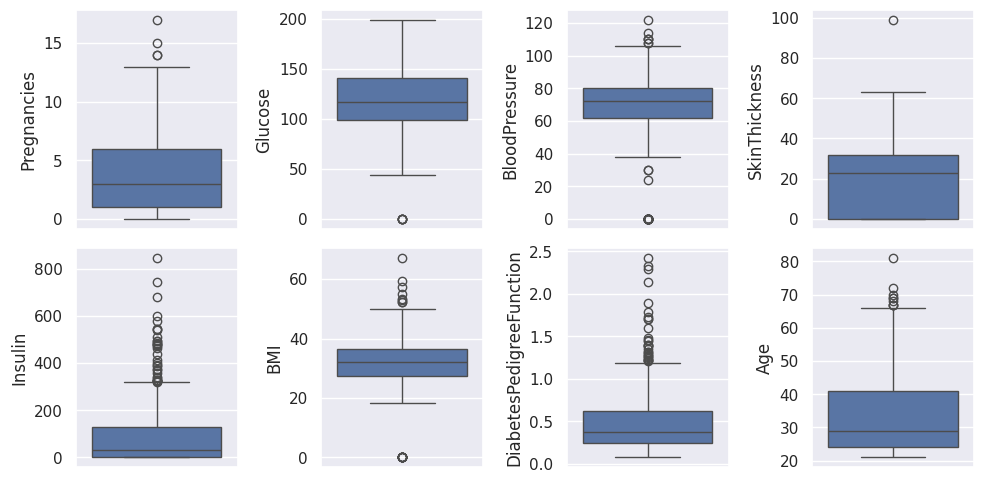

In [ ]:
# Outlier analysis
features = data.drop(['Outcome'], axis=1).columns

def detect_outlier(features):
  figure, ax = plt.subplots(2, 4, figsize=(10, 5))
  for index, col in enumerate(features):
    sns.boxplot(ax=ax[index//4, index%4], data=data[col])
  plt.tight_layout()

detect_outlier(features)

Box plot results indicate that all features have outliers.

In [ ]:
# Outlier Treatment

def outlier_treatement(features):
  for col in features:
    q1 = data[col].quantile(.25)
    q3 = data[col].quantile(.75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    data[col].clip(lower_fence, upper_fence, inplace=True)

outlier_treatement(features)


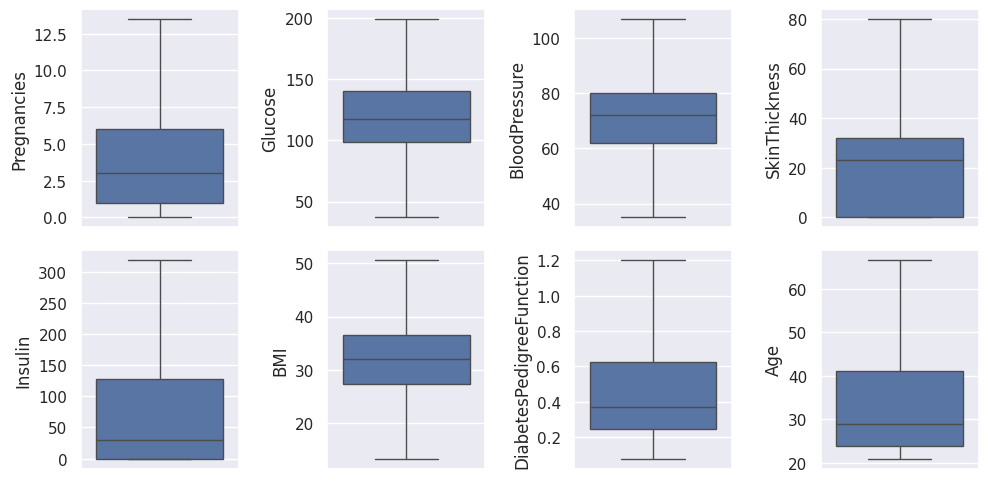

In [ ]:
# Verfiy outlier treatement
detect_outlier(features)

As we can see from the box plot above, outlier is handled for all the features.

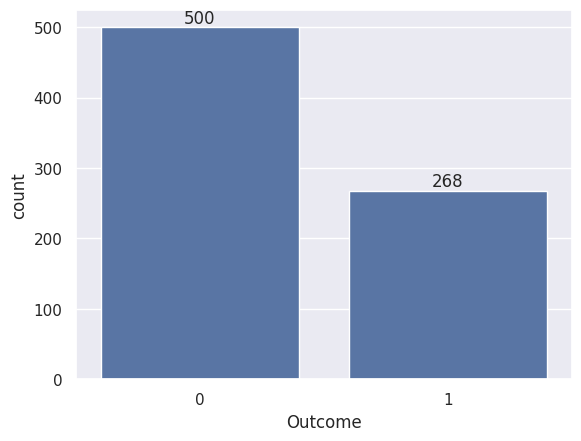

In [ ]:
# Check data balancing
ax = sns.countplot(data=data, x ='Outcome')
plt.bar_label(ax.containers[0])
plt.show()

In [ ]:
# Segregate feature and target
X = data.drop(['Outcome'], axis=1)
y = data[['Outcome']]
print(f"Dimention of features: {X.shape}")
print(f"Dimention of target: {y.shape}")

Dimention of features: (768, 8)
Dimention of target: (768, 1)


In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Dimention of X_train: {X_train.shape}")
print(f"Dimention of X_test: {X_test.shape}")
print(f"Dimention of y_train: {y_train.shape}")
print(f"Dimention of y_test: {y_test.shape}")

Dimention of X_train: (576, 8)
Dimention of X_test: (192, 8)
Dimention of y_train: (576, 1)
Dimention of y_test: (192, 1)


# Build Adaboost Base model

In [ ]:
# Build Adaboost base model
model = AdaBoostClassifier().fit(X=X_train, y=y_train)
y_train_pred = model.predict(X_train)

Classification reports for ada boost:

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       377
           1       0.79      0.72      0.75       199

    accuracy                           0.84       576
   macro avg       0.82      0.81      0.81       576
weighted avg       0.83      0.84      0.83       576



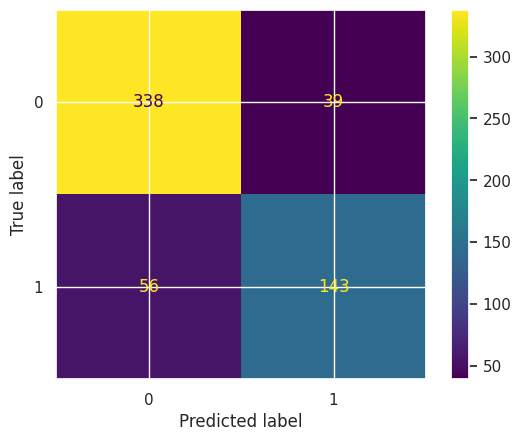

In [ ]:
# Evaluation of training result
print(f"Classification reports for ada boost:\n\n{classification_report(y_train, y_train_pred)}")
cm = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)

Classification reports for ada boost:

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       123
           1       0.63      0.65      0.64        69

    accuracy                           0.74       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.74      0.74      0.74       192



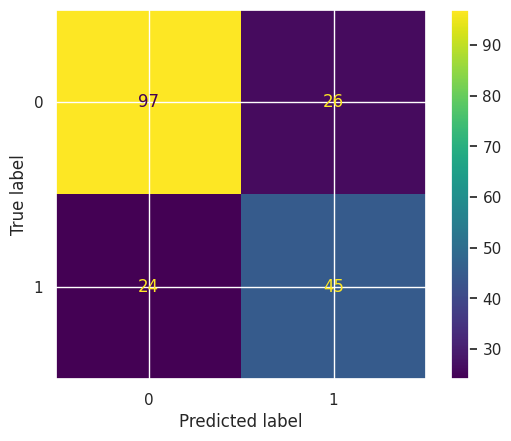

In [ ]:
# Evaluation of test results
y_test_pred = model.predict(X_test)

# Evaluation of training result
print(f"Classification reports for ada boost:\n\n{classification_report(y_test, y_test_pred)}")
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

### Conclusion

1. Recall importance for diabetics predictions:
  - Recall is crucial for biebetics predictions since it measures the model abilities to correctly identify positive cases.
  - In healthcase false negative(not detecting when patient has diabetic) are more crucial than false positive.

2. Performance on training vs Testing sets:
  - Training performance are better than testing, indicating overfitting
  - This happens when the model learns the training data pattern too well and fails to generalize to unseen data

3. Bias toward class 0:
  - The model shows clear bias towards class 0, as evident from its higher precision, recall and F-1 score compare to class 1.
  - This bias indicate that the model performs better for class 0, likely due to the data imbalance.

### Next Course of Actions

1. Address data imbalance using one of the below techniques:
   - Oversampling minority class
   - Under sampling majority class
   - Class wieghing in adaboost to assign higher importance to class 1
2. Improve model generalization to reduce overfitting:
   - Tune hyper parameter(no enstimators and learning rate)
   - Cross validations